## Project : Classification

#### Due Date: Saturday February 18 at 11:59PM ET

In this assignment, we will learn to classify songs into genres based on lyrics. We will get practice with

- processing strings
- manipulating tables
- generating charts
  
The questions guide you step-by-step through these approaches. 

#### Collaboration Policy

You are prohibited from sharing your solutions. You are discouraged from providing guidance or assistance on questions. You should refrain from discussing the assignment with others. Consult the syllabus for information about policies surrounding misconduct.

**Name:** *Howard Hong*

**NetId:** *yh2809*

### Rubric

Question | Points
--- | ---
Question 1.1 | 1
Question 1.2 | 1
Question 1.3 | 1
Question 1.4 | 1
Question 2.1 | 1
Question 2.2 | 2
Question 3.1 | 1
Question 3.2 | 2
Question 4.1 | 3
Question 4.2 | 1
Question 5.1 | 2
Question 5.2 | 1
Question 5.3 | 1
Total | 18

We will study data adapted from the [Million Song Dataset](http://labrosa.ee.columbia.edu/millionsong/). 

<img src="image.PNG" width="550px">


The data consists of 

- title of song
- name of musical group 
- genre of song

with songs from the `Country` and `Hip-hop` genres. 

We want to use song lyrics to distinguish the genres. We have compiled about 5,000 words relevant to song lyrics. Differences in the frequency of words will help us to classify songs as `Country` or `Hip-hop`.

### 0. Load the Data

For the assignment we will need the

-  `numpy` package for manipulations of arrays
-  `matplotlib` package for generating charts
- `pandas` package for handling tables 

Moreover, we will need a helper function that generates charts with the `seaborn` package.

In [1]:
# import some packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import helper_functions

# change some settings

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)
plt.rcParams['figure.figsize'] = (10,8)

# indicate paths to files

import os 
home = os.environ["HOME"]
path_to_data = f"{home}/shared/project/lyrics.csv"
path_to_dictionary = f"{home}/shared/project/words.csv"

Note that we changed some of the default settings in `pandas` with `set_option` and in `matplotlib` with `rcParams`. 

In [2]:
lyrics = pd.read_csv(path_to_data)
lyrics.head(3)

,Title,Artist,Genre,i,...,santo,pe,gee,colleg
0,Buried Alive,Hell Razah,Hip-hop,0.028395,...,0.0,0.0,0.0,0.0
1,Little Things,Danni Leigh,Country,0.024862,...,0.0,0.0,0.0,0.0
2,Open,Afu-Ra,Hip-hop,0.052198,...,0.0,0.0,0.0,0.0


We can load the data into the table `lyrics`. Note the we have 4820 columns. 

In [3]:
lyrics.columns

Index(['Title', 'Artist', 'Genre', 'i', 'the', 'you', 'to', 'and', 'a', 'me',
       ...
       'seventh', 'capit', 'writer', 'motivo', 'bake', 'insist', 'santo', 'pe',
       'gee', 'colleg'],
      dtype='object', length=4820)

Note that each song has a unique title. Besides `Title`, `Artist` and `Genre`, we have about 5000 columns corresponding to words. The columns indicate the frequency of the words in songs. 

In [4]:
lyrics.loc[lyrics["Title"] == "In Your Eyes",['Title', 'Artist', 'Genre','like','love','the']]

,Title,Artist,Genre,like,love,the
962,In Your Eyes,Alison Krauss,Country,0.011905,0.059524,0.0


Here we have a few columns from the row for the country song "In Your Eyes" by Alison Krauss. The song contains 168 words. The word `like` appears two times  $$\frac{2}{168} \approx 0.0119$$ The word `love` appears 10 times $$\frac{10}{168} \approx 0.0595$$ The word `the` does not appear in the song. 

In [5]:
lyrics.drop(columns = ["Title", "Artist", "Genre"]).sum(axis = 1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1664    1.0
1665    1.0
1666    1.0
1667    1.0
1668    1.0
Length: 1669, dtype: float64

Since we include any word relevant to the lyrics, the sum of the frequencies is 1. Note that we have not stored the order of words in the song. We will learn to classify songs into genres based solely on the frequency of words.

#### Question 1 

We have processed the text in the lyrics. We have converted letters to lower case and we have truncated words through the stemming process. The stemming process alters suffixes from related words. For example, the stemming process converts 

- "manage"
- "manager"
- "managed"
- "managerial" 

to "manag". We say that "manag" is the stemmed form of "manage", "manager", etc. We have a table of words indicating the transformation. 

In [6]:
stemming = pd.read_csv(path_to_dictionary)
stemming.head(3)

,Stem,Word
0,día,día
1,pido,pido
2,hatr,hatred


#### Question 1.1

Compute the fraction of words in `stemming` that are unchanged under the stemming process. For example, words like such as "devour".

In [7]:
output = 0
for row in stemming.values:
    if row[0] == row[1]:
        output += 1

q1_1 = output / len(stemming)
print(output)      
print(q1_1)
# YOUR CODE HERE
#raise NotImplementedError()

3591
0.7216639871382636


In [8]:
# TEST 

assert 0 < q1_1 < 1


#### Question 1.2

What is the stemmed form of "message"?

In [9]:
for index, row in stemming.iterrows():
    if row[1] == "message":
        q1_2 = row[0]
print(q1_2)
# YOUR CODE HERE
#raise NotImplementedError()

messag


In [10]:
# TEST 

assert q1_2 in "message"


#### Question 1.3

The string "singl" is the stemmed form of what word? 

In [1]:
for index, row in stemming.iterrows():
    if row[0] == "singl":
        q1_3 = row[1]
print(q1_3)

# YOUR CODE HERE
#raise NotImplementedError()

NameError: name 'stemming' is not defined

In [12]:
# TEST 

assert "singl" in q1_3 


#### Question 1.1.4

We can compute the number of characters removed in the stemming process. 

In [13]:
stemming["length difference"] = stemming["Word"].str.len() - stemming["Stem"].str.len()
stemming.head(3)

,Stem,Word,length difference
0,día,día,0
1,pido,pido,0
2,hatr,hatred,2


What word was shortened the most by the stemming process?

In [14]:
max_word = stemming["length difference"].max()
for row in stemming.values:
    if row[2] == max_word:
        q1_4 = row[1]


print(q1_4)
# YOUR CODE HERE
#raise NotImplementedError()

international


In [15]:
# TEST 

assert q1_4 in stemming["Word"].values


### Question 2

We need to split `lyrics` into two datasets called `training_set` and `testing_set`. 

- We will use `training_set` to determine an approach to classifying songs into genres. 
- We will compare the predicted genres and observed genres in the `testing_set`. 

So `training_set` will help us to make classification and `testing_set` will help us to evaluate the classifications.

In [16]:
training_proportion = 0.8

number_songs = len(lyrics)
number_training = int(number_songs * training_proportion)

We need to ensure that the `training_set` and `testing_set` contain different songs. Moreover, we should split the sets at random to avoid any patterns in the rows. For example, we should not take the `training_set` to consist of `Country` songs and the `testing_set` to consist of `Hip-hop` songs. 

In [17]:
lyrics_shuffled = lyrics.sample(frac = 1, random_state = 42)

training_set = lyrics_shuffled.iloc[:number_training]
testing_set = lyrics_shuffled.iloc[number_training:]

In [18]:
print(training_set)
print(testing_set)

                                  Title                 Artist    Genre  \
941              Bring It On Home To Me          Mickey Gilley  Country   
988                 Early morning riser    Pure Prairie League  Country   
405                           We Danced           Brad Paisley  Country   
722           When We All Get To Heaven           Brad Paisley  Country   
1614  Between The Daylight And The Dark          Mary Gauthier  Country   
...                                 ...                    ...      ...   
658                               I Can                    Nas  Hip-hop   
1357                         Sinequanon                 Hybrid  Hip-hop   
1019                         Taste This                    Mýa  Hip-hop   
1599                          Duck Sick  Compton's Most Wanted  Hip-hop   
959                            Matchbox           Carl Perkins  Country   

             i  ...  santo   pe  gee  colleg  
941   0.052632  ...    0.0  0.0  0.0     0.0  
988  

We randomly shuffled the rows of `lyrics` with the `pandas` function `shuffle`. However we get the same `training_set` and `testing_set` each time we split `lyrics_shuffled`. The argument `random_state` allows us to have a reproducible shuffling of the data. Here 42 is an arbitrary number.

#### Question 2.1

__True or False:__ We have 80\% of the data in `training_set` and 20\% of the data in `testing_set`.

In [19]:
q2_0 = True

# YOUR CODE HERE
#raise NotImplementedError()

In [20]:
# TEST 

assert q2_0 in [True, False]


#### Question 2.2

We want to ensure that `training_set` and `testing_set` have a mix of the genres. Compute the proportion of `Country` songs in `training_set` and `testing_set`.

In [21]:
proportion_country_training = training_set["Genre"].value_counts()["Country"] / len(training_set)

proportion_country_testing = testing_set["Genre"].value_counts()["Country"] / len(testing_set)
print (proportion_country_training)
print (proportion_country_testing)
# YOUR CODE HERE
#raise NotImplementedError()

0.4943820224719101
0.5508982035928144


In [22]:
# TEST 

assert 0 < proportion_country_testing < 1
assert 0 < proportion_country_training < 1


We can generate a bar-chart from the proportions.

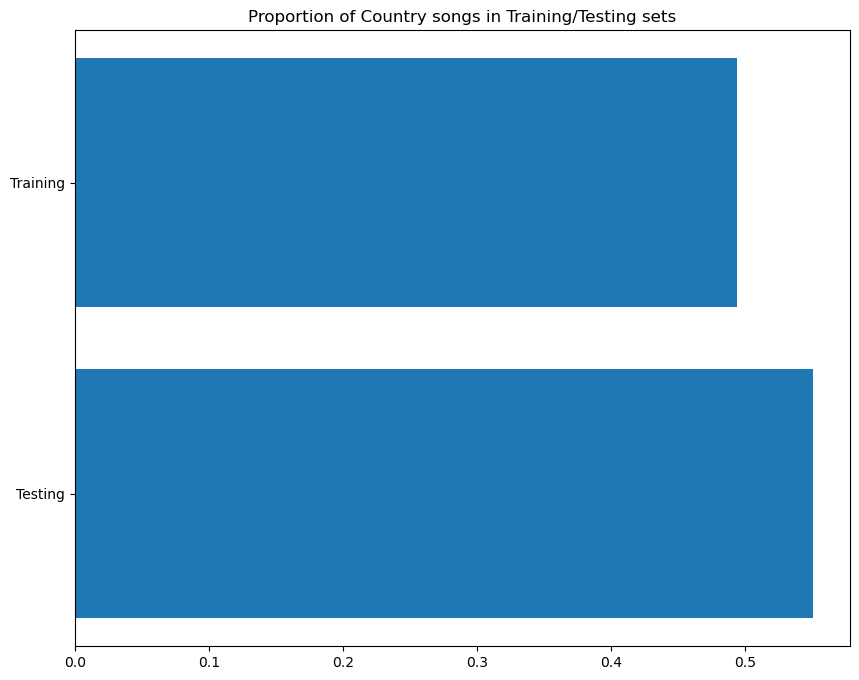

In [23]:
plt.barh(["Testing","Training"], [proportion_country_testing, proportion_country_training])
plt.title("Proportion of Country songs in Training/Testing sets");

### Question 3

We will use the k-nearest neighbors approach to classification. 

Each song in `training_set` and `testing_set` has a genre `Country` or `Hip-hop` for genre. However, we need to predict a genre for the songs in `testing_set`. If we want to classify a song in `testing_set` then we compare to the songs in `training_set`. We compare songs with the frequency of words. If the frequency of words in two songs are similar, then we expect the genre of the songs to be similar.  

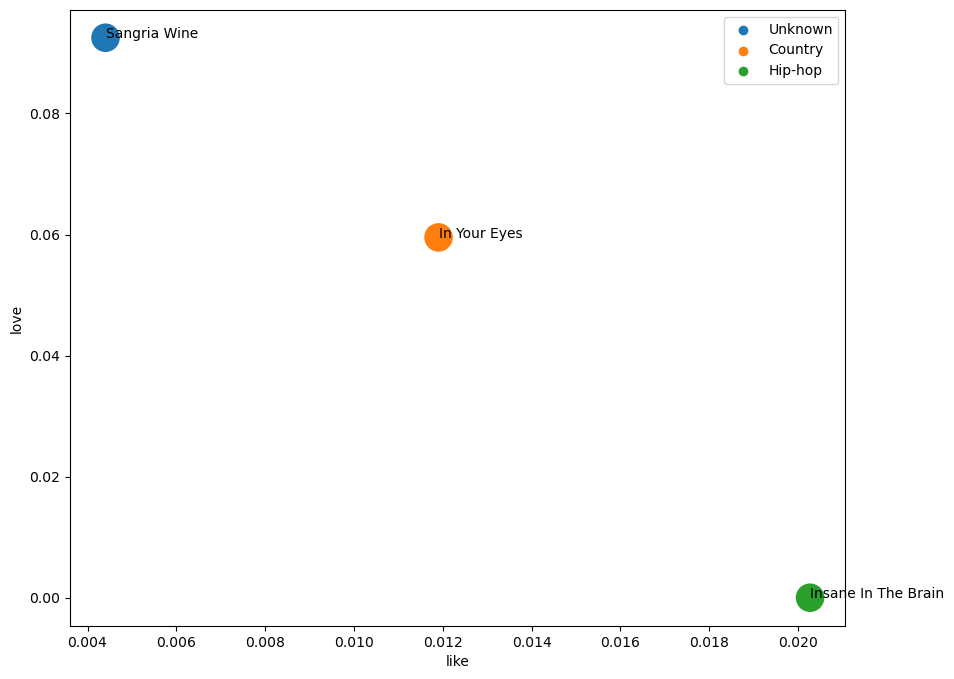

In [24]:
words = ["like", "love"]
unlableled_points = ["Sangria Wine"]
labeled_points = ["In Your Eyes", "Insane In The Brain"]

helper_functions.generate_scatterplot(words, unlableled_points, labeled_points, testing_set, training_set)

Here we have three songs

- `Sangria Wine` in the testing set
- `In Your Eyes` and `Insane In The Brain` in the training set

The genre of `Sangria Wine` is `Country`.

In [25]:
testing_set[testing_set["Title"] == "Sangria Wine"]

,Title,Artist,Genre,i,...,santo,pe,gee,colleg
686,Sangria Wine,Jerry Jeff Walker,Country,0.088106,...,0.0,0.0,0.0,0.0


Based on the frequency of words in the lyrics, we want to predict the genre. We can compare the frequency of words in the lyrics of `Sangria Wine` to the lyrics of `In Your Eyes` and `Insance In The Brain`. Here we have the frequencies of the words `like` and `love`. We learn that `Sangria Wine` is closer to `In Your Eyes` than `Insane in the Brain`. So we would correctly classifiy `Sangria Wine` as `Country` based on the words `like` and `love`. 

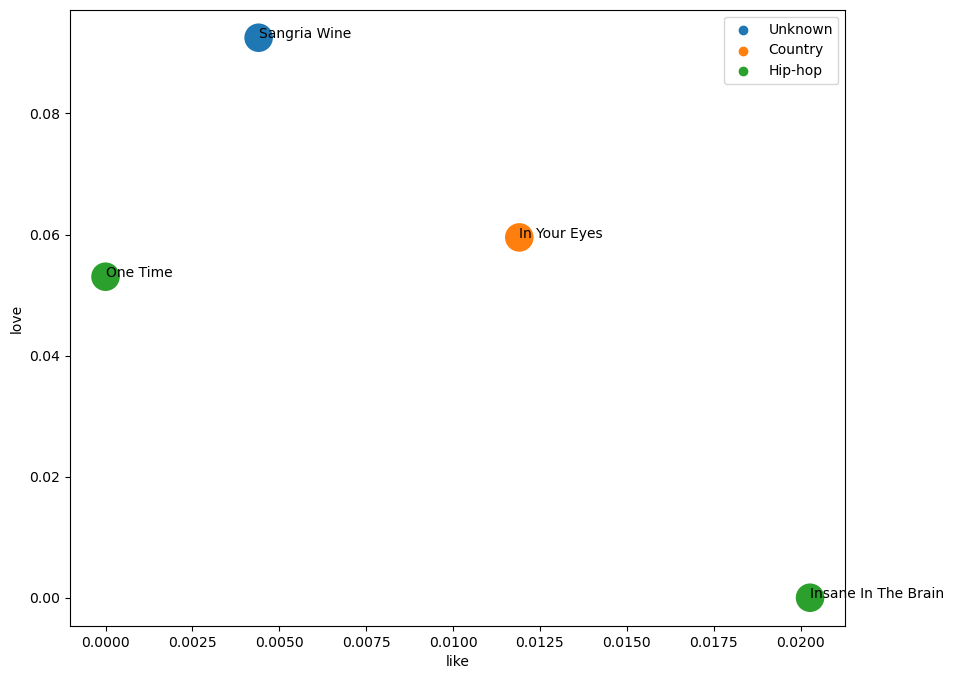

In [26]:
words = ["like", "love"]
unlableled_points = ["Sangria Wine"]
labeled_points = ["In Your Eyes", "One Time", "Insane In The Brain"]

helper_functions.generate_scatterplot(words, unlableled_points, labeled_points, testing_set, training_set)

We have many other songs in the training set. The song `One Time` in the `Hip-hop` genres seems close to `Sangria Wine` based on frequency of the words `like` and `love` in the lyrics. If we need to determine the distance from `Sangria Wine` to `In Your Eyes` and the distance from `Sangria Wine` to `One Time` then we need to calculate the distance in the plane between the points. We can use the formula

$$\sqrt{(\text{frequency of "like" in song 1} - \text{frequency of "like" in song 2})^2 + (\text{frequency of "love" in song 1} - \text{frequency of "love" in song 1})^2} $$ 

If we think of $(\text{frequency of "like" in song}, \text{frequency of "love" in song})$ like coordinates in the plane, then we can compute distance between points. 

In [27]:
in_your_eyes = training_set.loc[training_set["Title"] == "In Your Eyes",["like","love"]] 
sangria_wine = testing_set.loc[testing_set["Title"] == "Sangria Wine",["like","love"]]

distance = np.sum((sangria_wine.values - in_your_eyes.values)**2)
distance = np.sqrt(distance)

distance

0.03382894432459689

In [28]:
one_time = training_set.loc[training_set["Title"] == "One Time", ["like","love"]] 
sangria_wine = testing_set.loc[testing_set["Title"] == "Sangria Wine", ["like","love"]]

distance = np.sum((sangria_wine.values - one_time.values)**2)
distance = np.sqrt(distance)

distance

0.03972572223189776

We learn that `In Your Eyes` is closer to `Sangria Wine` than `One Time`. So we would correctly predict that `Sangria Wine` is `Country` genre based on the frequency of the words `like` and `love`. If we had many words then we could extend the formula to compute distance 

$$\sqrt{(\text{frequency of word 1 in song 1} - \text{frequency of word 1 in song 2})^2 + \ldots + (\text{frequency of word N in song 1} - \text{frequency of word N in song 1})^2} $$ 

Here $N$ could be $1,2,3,\ldots$. The expression gives us a small number for similar frequencies of words and a large number for dissimilar frequencies of words.

#### Question 3.1

We need to write a function that caculates the distance between two songs based on a collection of words. We will write a function `distance_two_songs` with input 

- `row_1` : row in table corresponding to song 1
- `row_2` : row in table corresponding to song 2
- `words` : list of words

and output the distance between the songs.

In [29]:
def distance_two_songs(row_1, row_2, words):
    coordinates_1 = row_1[words]
    coordinates_2 = row_2[words]

    distance = np.sum((row_2[words].values - row_1[words].values)**2)
    distance = np.sqrt(distance)
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return distance

Compute the distance between `In Your Eyes` and `Sangria Wine` based on the words `["like","love","the"]`

In [30]:
in_your_eyes = training_set.loc[training_set["Title"] == "In Your Eyes",:] 
sangria_wine = testing_set.loc[testing_set["Title"] == "Sangria Wine",:]

q2_1 = distance_two_songs(in_your_eyes,sangria_wine,["like","love","the"] )

# YOUR CODE HERE
#raise NotImplementedError()

In [31]:
# TEST 

assert 0.03 < q2_1 < 0.05


#### Question 3.2

If we want to classify a song in `testing_set` then we need to compute distance to the songs in the `training_set`. Having written a function to compute the distance between two songs, we need to repeatedly use the function on `training_set`. We have a helper function `compute_distances` with input

- `row` : row in table corresponding to song
- `training_set` : table containing songs in `training_set`
- `words` : list of words

and output array of distances. The output contains a number for each song in `testing_set`.

In [32]:
words = ["like", "love", "the"]
row = testing_set.loc[testing_set["Title"] == "Sangria Wine", :]

distance = helper_functions.compute_distances(row, training_set, words)
distance

array([0.09519904, 0.07280497, 0.1000939 , ..., 0.0892561 , 0.09677655,
       0.09382014])

We can add the distances to a copy of `training_set`.

In [33]:
training_set_with_distance = training_set.copy()
training_set_with_distance["distance"] = distance
training_set_with_distance.head(3)

,Title,Artist,Genre,i,...,pe,gee,colleg,distance
941,Bring It On Home To Me,Mickey Gilley,Country,0.052632,...,0.0,0.0,0.0,0.095199
988,Early morning riser,Pure Prairie League,Country,0.033962,...,0.0,0.0,0.0,0.072805
405,We Danced,Brad Paisley,Country,0.072289,...,0.0,0.0,0.0,0.100094


Which song is closest to `Sangria Wine` based on the frequency of the words `["like", "love", "the"]`?

In [34]:
#distance_value = training_set_with_distance["distance"].min()
#for row in training_set_with_distance.values:
#    if row[-1] == distance_value:
#        q2_2_1 = row[0]
#        q2_2_2 = row[2]
#print(q2_2_1)
#print(q2_2_2)
q2_2_1 = "I'm In Love"
# YOUR CODE HERE
#raise NotImplementedError()

In [35]:
# TEST 

assert q2_2_1 in training_set_with_distance["Title"].values


How would we classify `Sangria Wine` based on the genre of the nearest song? 

In [36]:
q2_2_2 = "Hip-hop"

# YOUR CODE HERE
#raise NotImplementedError()

In [37]:
# TEST 

assert q2_2_2 in ["Country", "Hip-hop"]


### Question 4

We learn from Question 3.2 that the nearest point might have the wrong genre. So we should study many nearby points. We fix an odd number $k$ like $3,5,7,\ldots$. We will calculate the $k$ nearest points in the `training_set` to the song in the `testing_set`. Among the $k$ nearest points will count the number of `Country` and `Hip-hop` songs. 

- If we have more `Country` than `Hip-hop` then we will clasify the song as `Country`
- If we have more  `Hip-hop` than `Country` then we will clasify the song as `Hip-hop`

Note that we use the same number $k$ throughout the classification. We need to evaluate the prediction to determine a choice of $k$.

#### Question 4.1

We take the 15 songs closest to `Sangria Wine`. Remember from Question 3 that we have used the words `["like", "love", "the"]` for `training_set_with_distance`.

In [38]:
training_set_with_distance_top_15 = training_set_with_distance.sort_values("distance", ascending = True).head(15)
training_set_with_distance_top_15

,Title,Artist,Genre,i,...,pe,gee,colleg,distance
331,I'm In Love,"Evelyn Champagne"" King""",Hip-hop,0.052045,...,0.0,0.0,0.0,0.013627
1061,Your Love Gets Sweeter,Finley Quaye,Hip-hop,0.029536,...,0.0,0.0,0.0,0.021870
1534,All My Love,112,Hip-hop,0.020073,...,0.0,0.0,0.0,0.022150
810,Baby Love,MC Solaar,Hip-hop,0.000000,...,0.0,0.0,0.0,0.022844
464,True Love Ways,Mickey Gilley,Country,0.032520,...,0.0,0.0,0.0,0.028413
...,...,...,...,...,...,...,...,...,...
409,Tumbling Down,Allison Moorer,Country,0.008130,...,0.0,0.0,0.0,0.037901
1049,Dear Life,Anthony Hamilton,Hip-hop,0.054795,...,0.0,0.0,0.0,0.038197
232,When Love Finds You,Vince Gill,Country,0.000000,...,0.0,0.0,0.0,0.039807
1403,The Hardest Part,Allison Moorer,Country,0.007143,...,0.0,0.0,0.0,0.039982


We have a mix of `Hip-hop` and `Country` in the `Genre` column. Determine the number of `Hip-hop` songs and `Country` songs.

In [39]:
count_country_nearest_neighbors = training_set_with_distance_top_15["Genre"].value_counts()["Country"]

count_hiphop_nearest_neighbors = training_set_with_distance_top_15["Genre"].value_counts()["Hip-hop"]
print(count_country_nearest_neighbors)
print(count_hiphop_nearest_neighbors)
# YOUR CODE HERE
#raise NotImplementedError()

8
7


In [40]:
# TEST 

assert 0 < count_country_nearest_neighbors < 15
assert 0 < count_hiphop_nearest_neighbors < 15


How would we classify `Sangria Wine` based on the genres of the nearest 15 songs? 

In [41]:
q4_1 = "Country"

# YOUR CODE HERE
#raise NotImplementedError()

In [42]:
# TEST 

assert q4_1 in ["Country", "Hip-hop"]


#### Question 4.2

Note that we need to determine the most common genre among the nearest songs. Instead of counting the number of `Country` and `Hip-hop`, we can compute the mode meaning the most common value.

In [43]:
def compute_mode(column, table):
    return table[column].mode().values[0]

The function `compute_mode` has input 

- `column` : string indicating columns of the table 
- `table` : table containing data

and output the mode of a column in a table. 

Use `compute_mode` on the following table to predict the genre of `Sangria Wine` based on the 31 nearest songs.

In [44]:
training_set_with_distance_top_31 = training_set_with_distance.sort_values("distance", ascending = True).head(31)
training_set_with_distance_top_31

,Title,Artist,Genre,i,...,pe,gee,colleg,distance
331,I'm In Love,"Evelyn Champagne"" King""",Hip-hop,0.052045,...,0.0,0.0,0.0,0.013627
1061,Your Love Gets Sweeter,Finley Quaye,Hip-hop,0.029536,...,0.0,0.0,0.0,0.021870
1534,All My Love,112,Hip-hop,0.020073,...,0.0,0.0,0.0,0.022150
810,Baby Love,MC Solaar,Hip-hop,0.000000,...,0.0,0.0,0.0,0.022844
464,True Love Ways,Mickey Gilley,Country,0.032520,...,0.0,0.0,0.0,0.028413
...,...,...,...,...,...,...,...,...,...
1384,Almost in Love,Nate Dogg,Hip-hop,0.033019,...,0.0,0.0,0.0,0.050351
163,You Will Be My Ain True Love,Alison Krauss,Country,0.021739,...,0.0,0.0,0.0,0.050883
1131,My Babe,Mickey Gilley,Country,0.045226,...,0.0,0.0,0.0,0.052349
1079,A Love That Will Never Grow Old,Emmylou Harris,Country,0.045198,...,0.0,0.0,0.0,0.053342


In [45]:
q4_2 = compute_mode("Genre", training_set_with_distance_top_31)

# YOUR CODE HERE
#raise NotImplementedError()

In [46]:
# TEST 

assert q4_2 in ["Country", "Hip-hop"]


### Question 5

We have been working with the words `["like", "love", "the"]`. However, we need to choose words that help us to differentiate between genres. Based on common words in the `Country` and `Hip-hop` genres, we will try the words `["street","style","truck","lone"]`. 

In [47]:
words = ["like","love","the","street","style","truck","lone"]

We want to calculate the accuracy of the predictions to determine the relevance of these words to classifying songs into genres. 

#### Question 5.1

We can make a copy of the training set. We will add a column with the distance to a song in the testing set.

In [48]:
training_set_with_distance = training_set.copy()

Here we will take $k=15$. 

In [49]:
k = 15

We need to iterate through the rows of `testing_set` to determine predictions.

In [50]:
predictions = []

# iterate through the rows of testing_set
for idx, row in testing_set.iterrows():
    #compute distance from a song to the songs in training_set
    distance = helper_functions.compute_distances(row, training_set_with_distance, words)
    training_set_with_distance["distance"] = distance
    
    # sort the songs in traing_set by distance
    training_set_with_distance_top_k = training_set_with_distance.sort_values("distance", ascending = True).head(k)
    
    # determine mode 
    prediction = compute_mode("Genre", training_set_with_distance_top_k)
    
    # record the prediction
    predictions.append(prediction)

How many songs have we classified `Country`? How many songs have we classified `Hip-hop`?

In [51]:
count_country_testing = predictions.count("Country")
count_hiphop_testing = predictions.count("Hip-hop")

# YOUR CODE HERE
#raise NotImplementedError()

In [52]:
# TEST 

assert 100 < count_country_testing < 200
assert 100 < count_hiphop_testing < 200


#### Question 5.2

We can compute the accuracy of the predictions. Here we need to calculate

$$\displaystyle \frac{\text{number correct predictions}}{\text{number of predictions}}$$

We can add `predictions` to a copy of `testing_set`.

In [53]:
testing_set_with_predictions = testing_set.copy()
testing_set_with_predictions["predictions"] = predictions
testing_set_with_predictions.head(3)

,Title,Artist,Genre,i,...,pe,gee,colleg,predictions
1565,Just Say She's A Rhymer,Mary Gauthier,Country,0.064327,...,0.0,0.0,0.0,Country
283,John Walker's Blues,Steve Earle,Country,0.038462,...,0.0,0.0,0.0,Hip-hop
797,My Baby Walked Right Out On Me,Wanda Jackson,Country,0.055046,...,0.0,0.0,0.0,Country


We can compare the `Genre` column and the `predictions` column.

In [54]:
accuracy = np.sum(testing_set_with_predictions["Genre"] == testing_set_with_predictions["predictions"]) / len(testing_set_with_predictions)
accuracy

0.6706586826347305

We find that 67\% of the classification are correct. 

If we used $k=31$ then what is the accurcy of the classifications?

In [55]:
k = 31

predictions_1 = []

# iterate through the rows of testing_set
for idx, row in testing_set.iterrows():
    #compute distance from a song to the songs in training_set
    distance = helper_functions.compute_distances(row, training_set_with_distance, words)
    training_set_with_distance["distance"] = distance
    
    # sort the songs in traing_set by distance
    training_set_with_distance_top_k = training_set_with_distance.sort_values("distance", ascending = True).head(k)
    
    # determine mode 
    prediction = compute_mode("Genre", training_set_with_distance_top_k)
    
    # record the prediction
    predictions_1.append(prediction)

    testing_set_with_predictions = testing_set.copy()
testing_set_with_predictions["predictions"] = predictions_1
testing_set_with_predictions.head(3) 
q5_2 = np.sum(testing_set_with_predictions["Genre"] == testing_set_with_predictions["predictions"]) / len(testing_set_with_predictions)

# YOUR CODE HERE
#raise NotImplementedError()

In [56]:
# TEST 

assert 0 < q5_2 < 1


#### Question 5.3

Having computed the accuracy for $k=31$ and $k=15$, compute the accuracy for $k=7$. 

In [57]:
k = 7

predictions_2 = []

# iterate through the rows of testing_set
for idx, row in testing_set.iterrows():
    #compute distance from a song to the songs in training_set
    distance = helper_functions.compute_distances(row, training_set_with_distance, words)
    training_set_with_distance["distance"] = distance
    
    # sort the songs in traing_set by distance
    training_set_with_distance_top_k = training_set_with_distance.sort_values("distance", ascending = True).head(k)
    
    # determine mode 
    prediction = compute_mode("Genre", training_set_with_distance_top_k)
    
    # record the prediction
    predictions_2.append(prediction)

    testing_set_with_predictions = testing_set.copy()
testing_set_with_predictions["predictions"] = predictions_2
testing_set_with_predictions.head(3) 
q5_3 = np.sum(testing_set_with_predictions["Genre"] == testing_set_with_predictions["predictions"]) / len(testing_set_with_predictions)


# YOUR CODE HERE
#raise NotImplementedError()

In [58]:
# TEST 

assert 0 < q5_3 < 1


We can generate a chart to show the accuracy for different choices of $k$. 

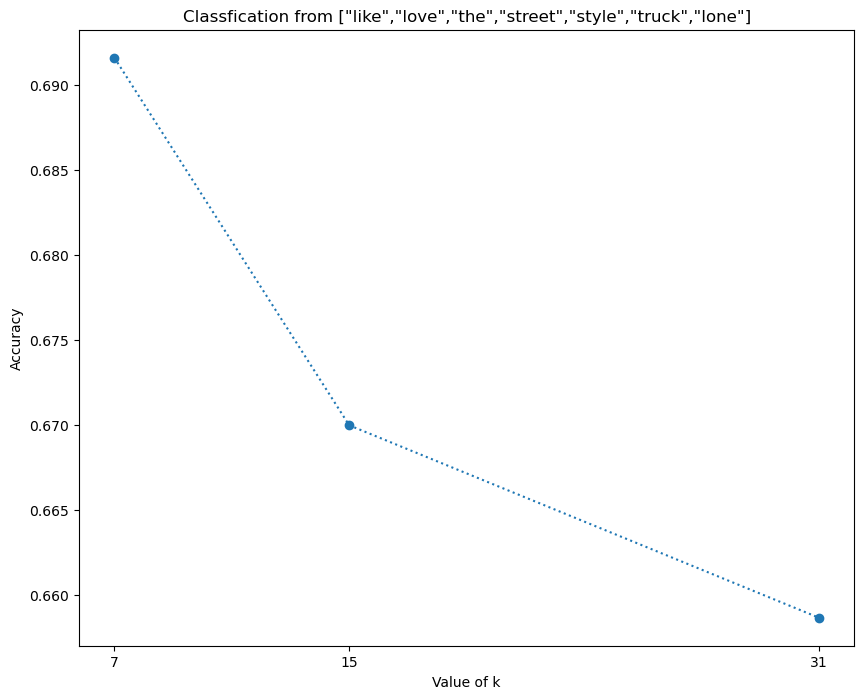

In [59]:
plt.plot([7,15,31], [q5_3,0.67,q5_2], "o:")

plt.xticks([7,15,31])
plt.ylabel("Accuracy")
plt.xlabel("Value of k")

plt.title('Classfication from ["like","love","the","street","style","truck","lone"]');

We learn that $k=7$ give the most accurate classifications. If we experimented with the collection of words, then we would be able to make even more accurate classfications!